# 5-Flower Dataset

`Machine Perception`
- Asking machine learning model to learn to perceive what's in the image

`Computer Vision`
- Type of perception is analogous to human sight


[flower-dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers)
- `'Daisy', 'Roses', 'Dandelions', 'Sunflowers' & 'Tuplips'`



**should not be used as a template, but as an example**

1. Quantity
  - to train ML models from scratch, you'll need to collect millions of images
  - There are alternative approaches that work with fewer images, but you should attempt to collect the largest dataset that is practical
2. Data Format
  - Storing the images as individual JPEG files is very inefficient because most of your model training time will be spent waiting for data to be read.
  - Better to use TensorFlow Record Format
3. Content
  - The dataset itself consists of found data - images that were not explicitly collected for the classification task.
  - Collect data more puposefully
4. Labelling


## Confirming if GPU is being used

In [1]:
import tensorflow as tf
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.6.0
Found GPU at: /device:GPU:0


## Examining the Images

In [2]:
!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -5

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy


## Reading Image Data

1. `img = tf.io.read_file(filename)` Used to read the file and convert it into pixel data - also called decoding
2. `img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)` specifying the number of color channels (red, green, blue) from the JPEG
3. `img = tf.image.convert_image_dtype(img, tf.float32)` pixel values consist of RGB that are of type uint and in the range of [0, 255], this converts them into a float scale so they lie in the range [0, 1]
4. `tf.image.resize(img, reshape_dims)` resizing to a desired shape



In [3]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

IMG_HEIGHT = 224
IMG_WIDTH  = 224
IMG_CHANNELS = 3

In [4]:
def read_and_decode(filename, reshape_dims):

  # Read the file - convert them into pixel data, also called decoding
  img = tf.io.read_file(filename)

  # Convert the compressed string to a 3D uint8 tensor - specifying the number of 
  # color channels (red, green, blue) from JPEG
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # Use `convert_image_dtype` to convert to floats in the [0, 1] range
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Resize the image to the desired size
  return tf.image.resize(img, reshape_dims) 

In [5]:
CLASS_NAMES = [item.numpy().decode('utf-8')
              for item in tf.strings.regex_replace(tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*"),
                 "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", "")]

# for item in CLASS_NAMES:
#   if item.find(".") == -1:
#     print(item)

CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available class: ", CLASS_NAMES)

These are the available class:  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## What's a Tensor

1D array -> vector

2D array -> matrix

*tensor* -> an array with any number of dimensions 

A matrix with 12 rows and 18 columns is said to have a *shape* of (12, 18) and a *rank* of 2

`x = np.array([2.0, 3.0, 1.0, 0.0])`

`x5d = np.zeros(shape=(4, 3, 7, 8, 3))`

For obtaining hardware acceleration use TensorFlow

`tx = tx.convert_to_tensor(x, dtype=tf.float32)`

converting back to numpy array `x = tx.numpy()`

Mathematiclly numpy anf TensorFlow are the same
  - numpy arithmetic is done on the CPU
  - TensorFlow code runs on GPU 

`x = x * 0.3` is less efficient than `tx = tx*0.3`

**Efficient to vectorize the code so that you can carry out a single in-place tensor operation instead of a bunch of tiny scalar operations**

## Visualizing Image Data

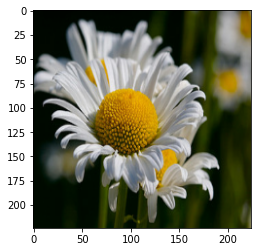

In [6]:
def show_image(filename):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  plt.imshow(img.numpy())

show_image("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg")

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/100930342_92e8746431_n.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094729603_eeca3f2cb6.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10128546863_8de70c610d.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10163955604_ae0b830975_n.jpg


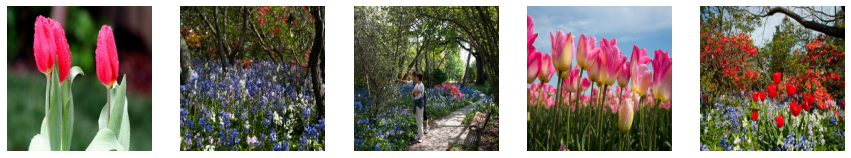

In [7]:
tuplis = tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15, 15))

for idx, filename in enumerate(tuplis[:5]):
  print(filename)

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()))
  ax[idx].axis('off')

In [8]:
tf.strings.split(tf.strings.regex_replace("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg",
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", ""),'/')[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'tulips'>

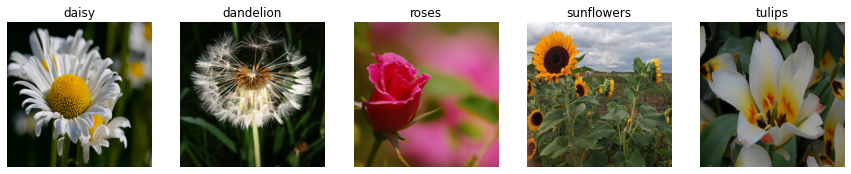

In [9]:
f, ax = plt.subplots(1, 5, figsize=(15, 15))

for idx, filename in enumerate([
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713398906_28e59a225a_n.jpg"]):

  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

  ax[idx].imshow((img.numpy()))
  ax[idx].set_title(CLASS_NAMES[idx])
  ax[idx].axis('off')



## Reading the Dataset File

Reading all the images using the wildcard

`tf.io.gfile.glob("gs://cloud-ml-data/img/flower_photos/*/*.jpg)`

In [10]:
basename = tf.strings.regex_replace(filename, 
                                    "gs://cloud-ml-data/img/flower_photos/", "")
label = tf.strings.split(basename, '/')[0]
print(label)

tf.Tensor(b'gs:', shape=(), dtype=string)


In [11]:
# Specify what TensorFlow needs to erplace in ordr to handle a line where one or more values are missing
def decode_csv(csv_row):
  record_defaults = ['path', 'flower']
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  return img, label_string

In [12]:
dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").
    map(decode_csv))

`take(3)` truncates the datset to three items

print out the average pixel value using `tf.reduce_mean()`


label -> string tensor

```
tf.Tensor(b'daisy', shape=(), dtype=string) 
tf.Tensor([0.3588961  0.36257887 0.26933077], 
          shape=(3,), dtype=float32)
```

avg -> 1D tensor of length 3
  - we got 1D tensor because of `axis=[0, 1]`

`[IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS]` providing an `axis=[0, 1]` we are asking tensor to compute the average of all columns (axis=0) and all rows (axis=1), but not to average the RGB values

In [13]:
for img, label in dataset.take(3):
  avg = tf.math.reduce_mean(img, axis=[0, 1]) # Average pixel in the image
  print(label, avg)

tf.Tensor(b'daisy', shape=(), dtype=string) tf.Tensor([0.3588961  0.36257887 0.26933077], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.32278517 0.32278517 0.32278517], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.20397592 0.13298093 0.07217225], shape=(3,), dtype=float32)


## A Linear Model Using Keras

$Y_{j}=b_{j} + \binom{\Sigma}{rows}\binom{\Sigma}{cols}\binom{\Sigma}{channels} (w_{i}*x_{i})$

$b \to bias$ 

- without bias, we'd be forcing the output to be zero if all the pixels are black

### Keras Model
```
model = tf.keras.Sequential(
  [
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(len(CLASS_NAMES))
  ]
)
```
`Sequential model`
- layers are connected in a way that the **output of one layer is the input to the next**

`layers`
  - componenet that **takes tensor input**, applies TensorFlow operations to that input, and **outputs a tensor**

  1. implicit $\to$ `input layer`
    - asks for 3D image tensor
  2. `Flatten layer`
    - takes 3D image tensor as input
    - reshapes it to be a 1D tensor with the same number of values
    - connected to a `Dense layer` with one output for each class of flower
  3. `Dense layer`
    - every output is a weighted sum of every input and no weights are shared




```
model.compile(
  optimizer='adam', 
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)
```

#### Prediction function

```
pred = model.predict(
  tf.reshape(img, 
  [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS]
  )
)
```

`reshape()`
- `predict()` expects a batch of images
- reshape the img tensor as a batch consisting of one image

pred $\to$ shape is 5 because of the `Dense layer`
  1. model's confidence that the image in question is daisy
  1. model's confidence that the image in question is dandelion
  1. model's confidence that the image in question is roses
  1. model's confidence that the image in question is sunflowers
  1. model's confidence that the image in question is tulips

```
pred_label_index = tf.match.argmax(pred)
pred_label = CLASS_NAMES[pred_label_index]
```

converting logits $\to$ probability 

`prob = tf.math.softmax(pred)[pred_label_index]`

### Activation function
- not sufficient to simply call `model.predict()`, because `model.predict()` returns a weighted sum that is unbounded.
  - we can treat this weighted sum as logits and apply either sigmoid or the softmax function(depending on binary or multiclass classification problem) to obtain the probability

```
pred = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
prob = tf.math.softmax(pred)[pred_label_index]
```
For making it convenient we can add it directly in the model
```
model = tf.keras.Sequential(
  [
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
  ]
)
```
- doing this `model.predict()` would return 5 probabilities (not logits), one for each class
- any layer can have an activation function applied to its output.
  - `linear`, `sigmoid`, and `softmax`

### Optimizer
- used to tune the weights based on the training dataset
  1. `Stochastic gradient descent` (SGD)
    - the most basic optimizer
  2. `Adagrad` (adaptive gradients) and `Adams`
    - Improve upon the basic optimizer by adding features that allow for faster convergence
  3. `Ftlr`
    - Works well on extremely sparse daatsets with many categorical features

SGD and all its variants, including Adam, rely on receiving mini-batches of data

For each batch of data, we feed forward through the model and calculate the error and the gradient, or how much weight contributes to the error; then the optimizer updates the weights with this information, ready for the next batch of data

```
train_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv")
    .map(parse_csv))
    .batch(10)
```

In [14]:
def parse_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

In [15]:
train_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").
    map(parse_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv").
    map(parse_csv)).batch(10)

In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
                             tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 752645    
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


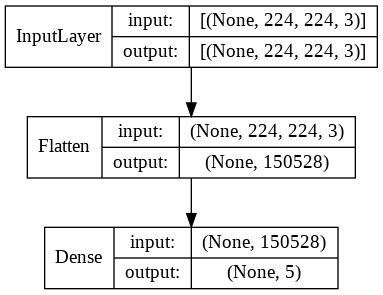

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [20]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
330/330 [==============================] - 127s 377ms/step - loss: 17.1192 - accuracy: 0.3458 - val_loss: 10.6935 - val_accuracy: 0.3703
Epoch 2/10
330/330 [==============================] - 116s 351ms/step - loss: 13.1967 - accuracy: 0.4036 - val_loss: 14.9213 - val_accuracy: 0.4189
Epoch 3/10
330/330 [==============================] - 98s 297ms/step - loss: 14.2765 - accuracy: 0.4545 - val_loss: 12.2818 - val_accuracy: 0.4541
Epoch 4/10
330/330 [==============================] - 98s 296ms/step - loss: 13.0047 - accuracy: 0.4867 - val_loss: 26.7684 - val_accuracy: 0.3568
Epoch 5/10
330/330 [==============================] - 97s 293ms/step - loss: 14.8930 - accuracy: 0.4806 - val_loss: 22.5459 - val_accuracy: 0.4081
Epoch 6/10
330/330 [==============================] - 99s 301ms/step - loss: 15.3214 - accuracy: 0.4918 - val_loss: 28.3335 - val_accuracy: 0.3622
Epoch 7/10
330/330 [==============================] - 101s 305ms/step - loss: 14.2164 - accuracy: 0.5273 - val_loss:

In [21]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(15, 5))
  
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric])
    ax[idx].set_xlabel("Epochs")
    ax[idx].plot(history.history['val_' + metric], ls='dashed')
    ax[idx].legend([metric, 'val_' + metric], fontsize=20)


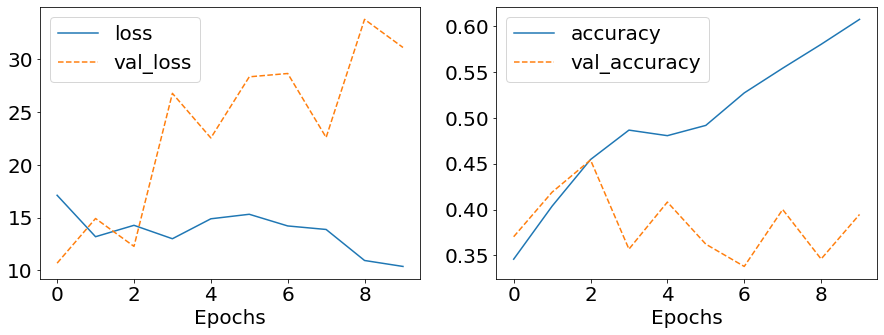

In [22]:
training_plot(['loss', 'accuracy'], history)

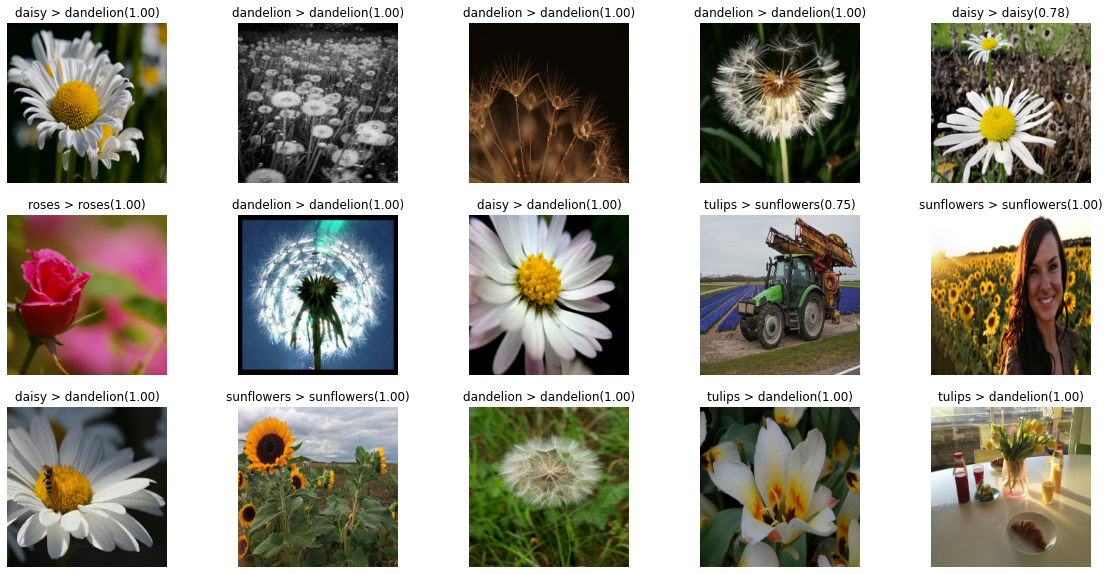

In [23]:
def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 10})
  f, ax = plt.subplots(3, 5, figsize=(20, 10))

  dataset = (tf.data.TextLineDataset(filename).map(parse_csv))

  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()))

    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)

    pred = batch_pred[0]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]


    label = CLASS_NAMES[label.numpy()]
    ax[idx//5, idx%5].set_title('{} > {}({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

plot_predictions("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv")

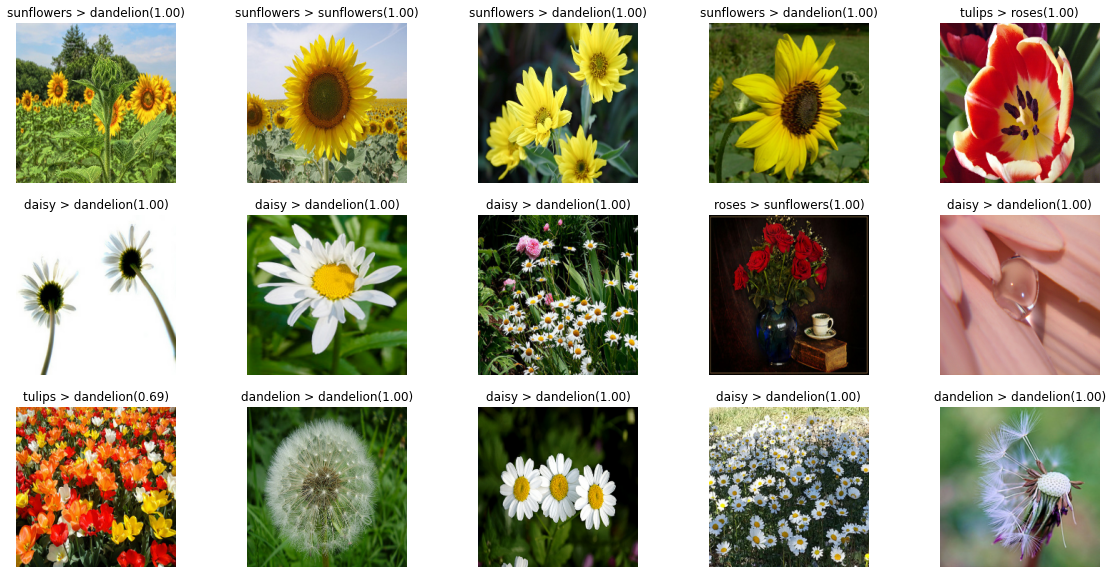

In [24]:
plot_predictions("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv")

## Probability, Odds, Logits, Sigmoid, & Softmax

**probability**
- likelihood than an event will occur over many trials

Event can happen with a probability *p* 

Probability of it not happening is *(1 - p)*

Odds that it will happen in any given trial = $\frac{p}{(1 - p)}$
- EG: $p = 0.25$ odds of the event happening are $\frac{0.25}{0.75}= 1:3$

**logit**
- natural logarithm of the odds of the event happening
- EG: $p = 0.25$, the logit is $\log(0.25/0.75)$ or -1.098

**Sigmoid**
- inverse of the logit function
- -1.098 is 0.25
- in the range of [0-1]

$\delta(Y)=\frac{1}{1+e^{-Y}}$

- If we have a dense layer in Keras with one Output node, by applying the sigmoid to it we can obtain a binary classifier that outputs a valid probability

**Softmax**
- multiclass counterpart of the sigmoid
- N mutually exclusice events, and their logits are given by $Y_{j}$, then softmax $(Y_{j})$, provides probability of the jth event

$S(Y_{j})=\frac{e^{-Y_{j}}}{\binom{\sum}{j} e^{-Y_{j}}}$

- nonlinear and has the effect of squashing low values and boosting the maximum
- sum of the probabilities in both instances adds up to 1.0

In [26]:
import numpy
filename = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv"
dataset = (tf.data.TextLineDataset(filename).map(parse_csv))

for idx, (img, label) in enumerate(dataset.take(1)):
  batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])  
  batch_pred = model.predict(batch_image)
  print(batch_pred[0])
  pred = batch_pred[0]
  pred_label_index = tf.math.argmax(pred).numpy()
  print(pred_label_index)
  pred_label = CLASS_NAMES[pred_label_index]
  print(pred_label)
  prob = pred[pred_label_index]      
  print(prob)

numpy.sum([1.0000000e+00, 4.3061690e-15, 6.3410596e-30, 1.5068152e-33, 3.3455088e-30])

[2.9226909e-05 9.9997079e-01 5.9353141e-29 0.0000000e+00 0.0000000e+00]
1
dandelion
0.9999708


1.0000000000000042

[0.09405971 0.0570501  0.8488902 ]
[0.04838872 0.0721875  0.8794238 ]


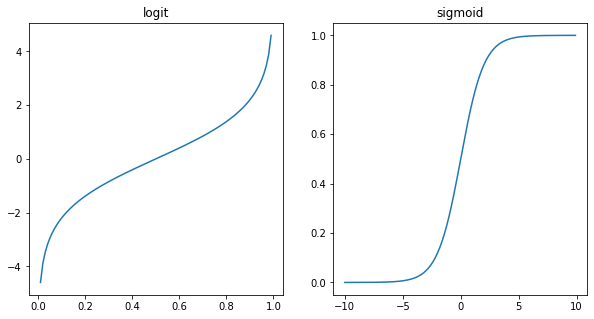

In [27]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x / (1 - x))

ax[0].plot(x,  y)
ax[0].set_title("logit")

x = np.arange(-10.0, 10.0, 0.1)
y = tf.math.sigmoid(x)

ax[1].plot(x, y)
ax[1].set_title('sigmoid')

print( tf.math.softmax([-1.0, -1.5, 1.2]).numpy() )
print( tf.math.softmax([0.1, 0.5, 3.0]).numpy() )

In [28]:
0.25/0.75

0.3333333333333333

In [29]:
import numpy
numpy.log(0.25/0.75)

-1.0986122886681098

Scaling weights for daisy in -0.12857194244861603 to 0.12166137248277664
Scaling weights for dandelion in -0.11050716042518616 to 0.13127559423446655
Scaling weights for roses in -0.11249586194753647 to 0.12485215067863464
Scaling weights for sunflowers in -0.17381735146045685 to 0.12874741852283478
Scaling weights for tulips in -0.11203165352344513 to 0.11922794580459595


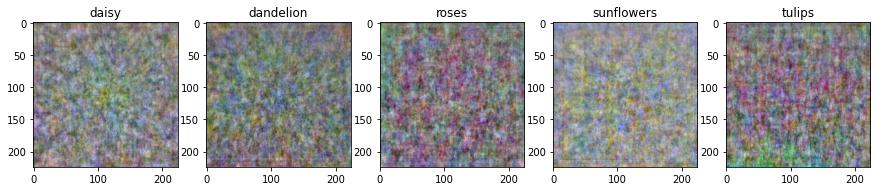

In [30]:
def show_trained_weights(model):
  # CLASS_NAMES is ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  LAYER = 1 # Layer 0 flattens the image, layer=1 is the first dense layer
  WEIGHT_TYPE = 0 # 0 for weight, 1 for bias

  f, ax = plt.subplots(1, 5, figsize=(15,15))
  for flower in range(len(CLASS_NAMES)):
    weights = model.layers[LAYER].get_weights()[WEIGHT_TYPE][:, flower]
    min_wt = tf.math.reduce_min(weights).numpy()
    max_wt = tf.math.reduce_max(weights).numpy()
    flower_name = CLASS_NAMES[flower]
    print("Scaling weights for {} in {} to {}".format(
        flower_name, min_wt, max_wt))
    weights = (weights - min_wt)/(max_wt - min_wt)
    ax[flower].imshow(weights.reshape(IMG_HEIGHT, IMG_WIDTH, 3));
    ax[flower].set_title(flower_name);

show_trained_weights(model)

[0.   0.09 0.06 0.85 0.  ] [0.         0.01696592 0.01094963 0.9720845  0.        ]
[0.09090909 0.09090909 0.6363636  0.09090909 0.09090909] [0.04651164 0.04651164 0.8139535  0.04651164 0.04651164]
[0.   0.25 0.5  0.25 0.  ] [0.        0.2       0.6000001 0.2       0.       ]
[0.08333333 0.08333333 0.3333333  0.41666666 0.08333333] [0.06113537 0.06113537 0.33624452 0.48034936 0.06113537]
[0.125 0.125 0.5   0.125 0.125] [0.09090909 0.09090909 0.6363636  0.09090909 0.09090909]


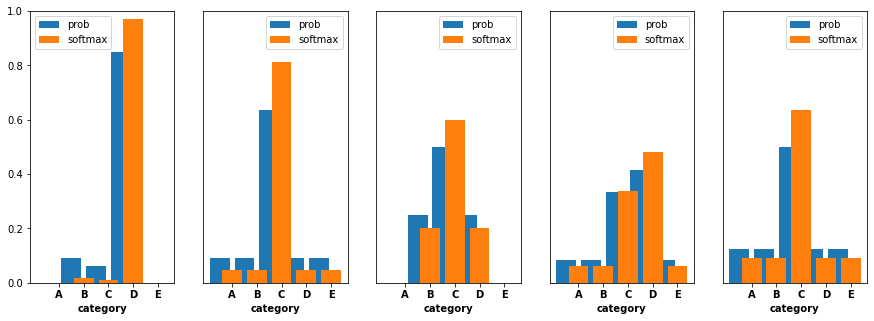

In [31]:
import tensorflow as tf

inx = [
    [0, 0.09, 0.06, 0.85, 0],
    [0.1, 0.1, 0.7, 0.1, 0.1],
    [0, 0.2, 0.4, 0.2, 0],
    [0.1, 0.1, 0.4, 0.5, 0.1],
    [0.2, 0.2, 0.8, 0.2, 0.2],
]

def logit(x):
    return - tf.math.log(1. / x - 1.)

barWidth = 0.5
r1 = np.arange(len(inx[0]))
r2 = [x + barWidth for x in r1]

f, ax = plt.subplots(1, 5, figsize=(15,5))
for idx, x in enumerate(inx):
    prob = x / tf.reduce_sum(x)
    softmax = tf.nn.softmax(logit(prob))
    print(prob.numpy(), softmax.numpy())
    ax[idx].bar(r1, prob, label='prob')
    ax[idx].bar(r2, softmax, label='softmax')
    ax[idx].set_xlabel('category', fontweight='bold')
    ax[idx].set_xticks(r2)
    ax[idx].set_xticklabels(['A','B','C','D','E'], fontweight='bold')
    ax[idx].set_ylim([0,1])
    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    ax[idx].legend()